In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.tools.plotting import scatter_matrix
from sklearn.cross_validation import train_test_split
from sklearn.metrics.scorer import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import ElasticNet, Ridge, Lasso
from sklearn.ensemble import GradientBoostingClassifier
%matplotlib inline

1. read in data
2. create y and x's
3. which x's should be removed, modified, etc.
4. train test split
5. cross val grid search over the training set



In [51]:
df = pd.read_csv('../hackerrank_data/shots.csv')
print df.head()

      shot_x     shot_y  shooter_velocity_ft_sec  shooter_velocity_angle  \
0  -1.643617  18.119135                 1.870883               23.618326   
1  -4.488024  22.658467                 1.001283              133.975882   
2  -3.935172   2.132872                10.471914                4.918328   
3  21.084429   0.482098                 2.230983              -96.206905   
4   7.844834  39.231280                12.000000               19.650760   

   dribbles_before  made  defender_distance  defender_angle  \
0                1     0          10.004074       33.036907   
1                0     0           7.655019      -13.404524   
2                1     0           3.610886      167.802771   
3                1     0           1.113495      -17.560110   
4                3     0           2.573718       16.306678   

   defender_velocity_ft_sec  defender_velocity_angle  
0                  4.906114               -59.100586  
1                  2.358548                10.362831  

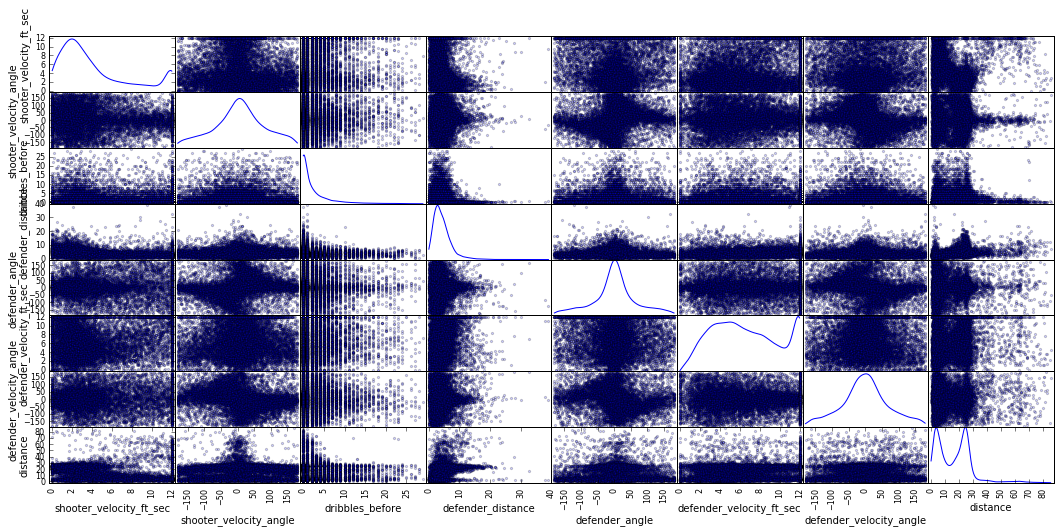

In [111]:
scatter_matrix(df, alpha=0.2, figsize=(18, 8), diagonal='kde')
plt.show()

In [52]:
y = df.pop('made')

df['distance'] = np.sqrt(df.shot_x**2 + df.shot_y**2)


# make dummies
df = pd.concat([df, pd.get_dummies(df['whatever_column'])], axis=1)

# df['fair'] = 0
# for ran in fair:
#     df.ix[df.fico_range == ran, 'fair'] = 1


# df[['distance', 'shooter_velocity_ft_sec', 's']]
df.drop(['shot_x', 'shot_y'], 1, inplace=True)
X = df
print X.head()

      shot_x     shot_y  shooter_velocity_ft_sec  shooter_velocity_angle  \
0  -1.643617  18.119135                 1.870883               23.618326   
1  -4.488024  22.658467                 1.001283              133.975882   
2  -3.935172   2.132872                10.471914                4.918328   
3  21.084429   0.482098                 2.230983              -96.206905   
4   7.844834  39.231280                12.000000               19.650760   

   dribbles_before  defender_distance  defender_angle  \
0                1          10.004074       33.036907   
1                0           7.655019      -13.404524   
2                1           3.610886      167.802771   
3                1           1.113495      -17.560110   
4                3           2.573718       16.306678   

   defender_velocity_ft_sec  defender_velocity_angle   distance  
0                  4.906114               -59.100586  18.193530  
1                  2.358548                10.362831  23.098668  
2 

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 23098)
print X_train.describe()

       shooter_velocity_ft_sec  shooter_velocity_angle  dribbles_before  \
count              7000.000000             7000.000000      7000.000000   
mean                  4.736095                6.505525         2.488857   
std                   3.766066               79.304804         4.139466   
min                   0.000000             -180.000000         0.000000   
25%                   1.729822              -41.100335         0.000000   
50%                   3.520085                7.302504         1.000000   
75%                   7.453809               54.932708         3.000000   
max                  12.000000              180.000000        29.000000   

       defender_distance  defender_angle  defender_velocity_ft_sec  \
count        7000.000000     7000.000000               7000.000000   
mean            4.337926        0.825288                  6.525380   
std             3.081654       68.364650                  3.456346   
min             0.000000     -180.000000    

In [84]:
# en = ElasticNet(normalize=True, alpha=.0000005, l1_ratio = .95)
# en.fit(X_train, y_train)
# print en.score(X_train, y_train)

# en = Lasso(normalize=True, alpha=.000001)
# en.fit(X_train, y_train)
# print en.score(X_train, y_train)

# en = Ridge(normalize=True, alpha=.0005)
# en.fit(X_train, y_train)
# print en.score(X_train, y_train)

0.655


The first method I use is logistic regression. The two hyperparameters I tune are (1) lambda (the coefficient on the penalty term) and (2) the elastic net mixing parameter. I also normalize the data since this algorithm uses a distance metric.

In [106]:
def scorer(y_actual, y_pred):
    return np.mean(np.where(y_actual==np.where(y_pred>.5, 1, 0), 1, 0))

In [105]:
en = ElasticNet(normalize=True)

score = make_scorer(scorer, greater_is_better=True)

param_dict = {'alpha': [0.00001, 0.00005, 0.0001, 0.001, 0.01, 0.1, .25, .5, .75, 1],
    'l1_ratio': [0, .45, .475, .5, .525, .55, 1]}
gsCV = GridSearchCV(en, param_dict, n_jobs = -1, scoring=score)
gsCV.fit(X_train, y_train)

print gsCV.best_params_
print gsCV.best_score_

0.660094299186
0.639674378749
0.639674378749
0.659237033862
0.666095156451
0.640102827763
0.659237033862
0.666095156451
0.640102827763
0.6588084012
0.665237891127
0.639674378749
0.6588084012
0.665666523789
0.639674378749
0.6588084012
0.666095156451
0.63881748072
0.660094299186
0.664380625804
0.664380625804
0.646101113967
0.652807543935
0.646101113967
0.660094299186
0.669952850407
0.644815766924
0.661380197171
0.670381483069
0.644387317909
0.660094299186
0.670810115731
0.643101970865
0.660522931847
0.671238748393
0.643101970865
0.661380197171
0.672096013716
0.637960582691
0.660951564509
0.664809258465
0.672524646378
0.648671808055
0.64824335904
0.659665666524
0.672524646378
0.647814910026
0.661808829833
0.671667381054
0.647814910026
0.660522931847
0.671667381054
0.646529562982
0.660522931847
0.671238748393
0.644815766924
0.662237462495
0.672096013716
0.640102827763
0.664380625804
0.665666523789
0.659237033862
0.648949849979
0.596401028278
0.598371195885
0.598371195885
0.597942563223
0.5

The second classifier I use is gradient boost. The two hyperparameters I tune are the learning rate (step size) and the number of estimators (number of stumps). 

In [109]:
gbc = GradientBoostingClassifier()

param_dict = {'learning_rate': [0.00001, 0.00005, 0.0001, 0.001, 0.01, 0.1, .25, .5, .75, 1],
    'n_estimators': [50, 75, 100, 500]}
gsCV = GridSearchCV(gbc, param_dict, n_jobs = -1)
gsCV.fit(X_train, y_train)

print gsCV.best_params_
print gsCV.best_score_



{'n_estimators': 75, 'learning_rate': 0.1}
0.661428571429


In the above I performed a grid search with k-fold cross-validation in order to tune the hyperparamters for each method. 

The levels of the hyperparameters that scored the best were ... and ... This is an improvement from the baseline model. Which measure of performance did I use?

The k-folds cross-validation technique (I used the default number of folds which is three) helps mitigate overfitting. The two approaches I use also help mitigate overfitting. Specifically, 

After tuning the hyperparamters using the training set through cross-validation, I use the testing subsample to compare the two models and give an estimate of how the models would perform on a different, indepedent dataset taken from the same population. The performance estimates between the two models 

In [ ]:
# model
# .fit()

Here I train the ... model with ... values equal to ... to the entire dataset. Out of curiosity I look at its (accuracy or whatever) 

In [ ]:
# .predict(X)